# Data Sourcing and Division

In [4]:
# Importing Libraries
import requests
import pandas as pd 

In [5]:
# Data Source
source_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSz8Qs1gE_IYpzlkFkCXGcL_BqR8hZieWVi-rphN1gfrO3H4lDtVZs4kd0C3P8Y9lhsT1rhoB-Q_cP4/pub?output=xlsx'

In [6]:
# Getting Data from Source
r = requests.get(source_url, allow_redirects=True)

# Writing Data to File for easy Access and Security
open('dataset.xlsx', 'wb').write(r.content)

# Getting Data from File to Pandas Data Frame
raw_data = pd.read_excel('dataset.xlsx',sheet_name='Raw_Data')

### Preview obtained Data

In [7]:
raw_data

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,2020-01-30,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,2020-02-14,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,2020-02-02,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,2020-02-14,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,2020-02-03,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,2020-02-14,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,2020-03-02,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,2020-03-15,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,2020-03-02,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,2020-03-02,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17301,17301,NaN,2020-04-19,NaN,NaN,NaN,NaN,Bandipore,Jammu and Kashmir,JK,Hospitalized,Details awaited,NaN,NaN,NaN,2020-04-19,https://twitter.com/kansalrohit69/status/12519...,NaN,NaN,NaN
17302,17302,NaN,2020-04-19,NaN,NaN,NaN,NaN,Baramula,Jammu and Kashmir,JK,Hospitalized,Details awaited,NaN,NaN,NaN,2020-04-19,https://twitter.com/kansalrohit69/status/12519...,NaN,NaN,NaN
17303,17303,NaN,2020-04-19,NaN,30,M,NaN,Munger,Bihar,BR,Hospitalized,Details awaited,NaN,NaN,NaN,2020-04-19,https://twitter.com/sanjayjavin/status/1251938...,NaN,NaN,NaN
17304,17304,NaN,2020-04-19,NaN,36,M,NaN,Munger,Bihar,BR,Hospitalized,Details awaited,NaN,NaN,NaN,2020-04-19,https://twitter.com/sanjayjavin/status/1251938...,NaN,NaN,NaN


In [8]:
# Cleaning and Obtaining just the required columns of the data
data = raw_data[['Detected State','Detected City']]

# Removing all columns with missing values
data = data.dropna()

# Resetting index to avoid error
data.reset_index(inplace = True)

# Removing the extra column created by resetting index
data.drop(columns = ['index'],inplace = True)

# Preview the data to process
data

,Detected State,Detected City
0,Kerala,Thrissur
1,Kerala,Alappuzha
2,Kerala,Kasaragod
3,Delhi,East Delhi (Mayur Vihar)
4,Telangana,Hyderabad
...,...,...
2158,Karnataka,Uppinangadi
2159,Karnataka,Bantwala
2160,Jharkhand,Hindpiri
2161,Jharkhand,Hindpiri


# Defining Required Methods/Functions

In [9]:
'''
A function that can identify and returns name of city in each state that has maximum number of cases.
Used for Mathematical Proof of Concept.
'''

def identify(DF):
    DF.reset_index(inplace = True)
    LST = []
    # 'x' will have all the names of Cities in the State
    for x in DF['Detected City'].unique():
        # 'temp' is a DataFrame that contains details of the Current City
        temp = DF[DF['Detected City']==x]
        # The List 'DF' contains sub-lists with 'Name of City' and 'Number of Registered Cases'
        LST.append([x,temp['Detected City'].count()])
    # Converting the Nested List into a DataFrame
    DF_df = pd.DataFrame(LST)
    # Defining the Column Names
    DF_df.columns = ['City_Name','Number_Of_Patients']
    # Arranging the DataFrame in Descending Order to Obtain Cities with Max Cases on Top
    DF_df = DF_df.sort_values(by=['Number_Of_Patients'],ascending=False)
    DF_df.reset_index(inplace = True)
    return DF_df['City_Name'][0]

'''
A function that can identify and returns name of city and number of patients in each state.
Used for Visual Proof of Concept.
'''

def divide(DF):
    LST = []
    # 'x' will have all the names of Cities in the State
    for x in DF['Detected City'].unique():
        # 'temp' is a DataFrame that contains details of the Current City
        temp = DF[DF['Detected City']==x]
        # The List 'DF' contains sub-lists with 'Name of City' and 'Number of Registered Cases'
        LST.append([x,temp['Detected City'].count()])
    # Converting the Nested List into a DataFrame
    DF_df = pd.DataFrame(LST)
    # Defining the Column Names
    DF_df.columns = ['City_Name','Number_Of_Patients']
    # Arranging the DataFrame in Descending Order to Obtain Cities with Max Cases on Top
    DF_df = DF_df.sort_values(by=['Number_Of_Patients'],ascending=False)
    return DF_df

## Prooving Mathematically

In [10]:
# The dictionary SD will have Name of State and Name of corresponding city with max cases
sd = {}

for s_name in data['Detected State'].unique():
    sd[s_name] = identify(data[data['Detected State']==s_name])

In [11]:
# Converting the Obtained Dictionary to a Pandas Data Frame
final_data = pd.DataFrame.from_dict(sd, orient='index')

# Resetting Index so as to assign Column Names
final_data.reset_index(inplace = True)

# Assigning the Column Names
final_data.columns = ['Name of State','City with Maximum Cases']

In [12]:
final_data

,Name of State,City with Maximum Cases
0,Kerala,Kasaragod
1,Delhi,Nizamuddin area
2,Telangana,Hyderabad
3,Rajasthan,Bhilwara
4,Haryana,Gurugram
5,Uttar Pradesh,Noida
6,Ladakh,Leh
7,Tamil Nadu,Mettupalayam
8,Jammu and Kashmir,Hajin
9,Karnataka,Bengaluru


## Prooving Visually (2 Examples)

In [13]:
# Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

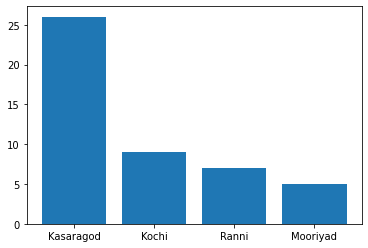

In [14]:
'''
Kerela Data
'''
KL_Data = data[data['Detected State'] == 'Kerala']
KL_Data = KL_Data.dropna()
KL_df = divide(KL_Data)

# Defining a Bar Graph
plt.bar(KL_df[:4]['City_Name'], KL_df[:4]['Number_Of_Patients'])

# Print the Graph
plt.show()

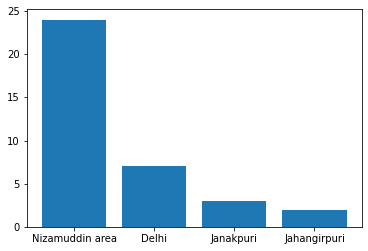

In [15]:
'''
Delhi Data
'''
DL_Data = data[data['Detected State'] == 'Delhi']
DL_Data = DL_Data.dropna()
DL_df = divide(DL_Data)

# Defining a Bar Graph
plt.bar(DL_df[:4]['City_Name'], DL_df[:4]['Number_Of_Patients'])

# Print the Graph
plt.show()

# Final Results

Through Mathematical and Visual approach it is confirmed that the proposed system is able to identify Hotposts in Each State of India.